In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
titanic_df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [6]:
titanic_df.isnull().sum().sum()

0

In [7]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [9]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [10]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

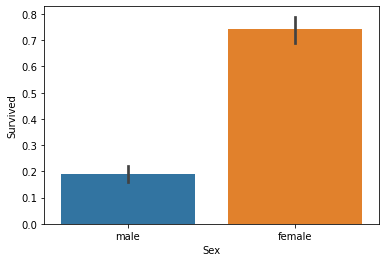

In [11]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

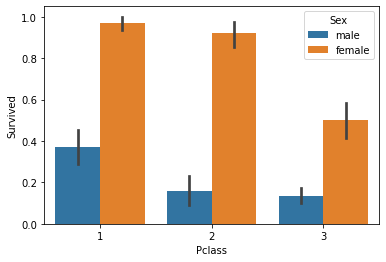

In [12]:
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=titanic_df)

In [13]:
titanic_df['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [14]:
def get_category(age):
    cat=''
    if age<= -1:
        cat='Unknown'
    elif age <=5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat

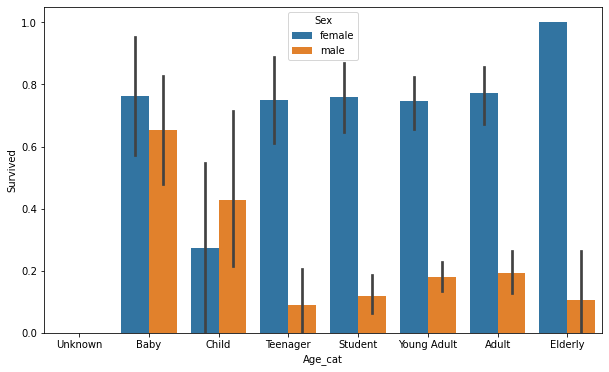

In [15]:
plt.figure(figsize=(10,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names, hue_order=['female','male'])
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [16]:
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S


In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
def encode_features(dataDF):
    features = ['Sex', 'Cabin', 'Embarked'] #숫자로 나타낼 핑드
    for feature in features:
        le= LabelEncoder()
        dataDF[feature]=le.fit_transform(dataDF[feature])
    return dataDF

In [19]:
encode_features(titanic_df).head() #메서드체이닝(앞 함수와 뒷 함수를 점으로 연결)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [20]:
#null처리함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

#머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    #방법1 df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True) #방법2
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[0]
    features = ['Sex', 'Cabin', 'Embarked'] #숫자로 나타낼 핑드
    for feature in features:
        le= LabelEncoder()
        df[feature]=le.fit_transform(df[feature])
    return df

#앞에 만든 함수를 차례대로 실행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
df = pd.read_csv('./titanic_train.csv')
transform_features(df).head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0
2,1,3,0,26.0,0,0,7.9250,7,3


In [22]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [23]:
X_titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test =  train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#평가는 매트릭스
from sklearn.metrics import accuracy_score

In [27]:
#클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

In [31]:
dt_clf.fit(X_train, y_train)
dt_pred =dt_clf.predict(X_test)
print(f'DecisionTreeClassifier: {accuracy_score(y_test, dt_pred):.4f}')

DecisionTreeClassifier: 0.7877


In [32]:
rf_clf.fit(X_train, y_train)
rf_pred =rf_clf.predict(X_test)
print(f'RandomForestClassifier: {accuracy_score(y_test, rf_pred):.4f}')

RandomForestClassifier: 0.8547


In [34]:
lr_clf.fit(X_train, y_train)
lr_pred =lr_clf.predict(X_test)
print(f'LogisticRegression: {accuracy_score(y_test, lr_pred):.4f}')

LogisticRegression: 0.8659


In [38]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [43]:
def exec_kfold(clf, x, y, folds=5):
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import KFold
    import numpy as np
    kfold = KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x)):
        X_train, X_test = x.values[train_index], x.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print(f"개별 교차검증 {iter_count}번째 정확도: {accuracy}")
    print(f'평균 정확도: {np.mean(scores)}')

In [45]:
exec_kfold(dt_clf, X_titanic_df, y_titanic_df, folds=5)

개별 교차검증 0번째 정확도: 0.7541899441340782
개별 교차검증 1번째 정확도: 0.7808988764044944
개별 교차검증 2번째 정확도: 0.7865168539325843
개별 교차검증 3번째 정확도: 0.7696629213483146
개별 교차검증 4번째 정확도: 0.8202247191011236
평균 정확도: 0.782298662984119


In [46]:
exec_kfold(rf_clf, X_titanic_df, y_titanic_df, folds=5)

개별 교차검증 0번째 정확도: 0.7932960893854749
개별 교차검증 1번째 정확도: 0.8089887640449438
개별 교차검증 2번째 정확도: 0.8370786516853933
개별 교차검증 3번째 정확도: 0.7752808988764045
개별 교차검증 4번째 정확도: 0.8595505617977528
평균 정확도: 0.8148389931579938


In [47]:
exec_kfold(lr_clf, X_titanic_df, y_titanic_df, folds=5)

개별 교차검증 0번째 정확도: 0.7932960893854749
개별 교차검증 1번째 정확도: 0.7921348314606742
개별 교차검증 2번째 정확도: 0.7752808988764045
개별 교차검증 3번째 정확도: 0.7471910112359551
개별 교차검증 4번째 정확도: 0.8426966292134831
평균 정확도: 0.7901198920343984


In [48]:
from sklearn.model_selection import cross_val_score

In [50]:
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
print(np.mean(scores))

0.7879291946519366


In [52]:
scores = cross_val_score(rf_clf, X_titanic_df, y_titanic_df, cv=5)
print(scores)
print(np.mean(scores))

[0.79329609 0.79775281 0.84831461 0.76404494 0.86516854]
0.8137153976523758


In [53]:
scores = cross_val_score(lr_clf, X_titanic_df, y_titanic_df, cv=5)
print(scores)
print(np.mean(scores))

[0.7877095  0.79213483 0.7752809  0.76404494 0.82022472]
0.7878789780930262


In [54]:
from sklearn.model_selection import GridSearchCV

In [60]:
param = {'max_depth': [2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = param, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)
print(f'최적의 파라메타: {grid_dclf.best_params_}')
print(f'최고 정확도:{grid_dclf.best_score_}')

최적의 파라메타: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도:0.7991825076332119


In [61]:
pred = grid_dclf.best_estimator_.predict(X_test)
accuracy_score(y_test, pred)

0.8715083798882681